# Analytical vs. numerical approach

/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


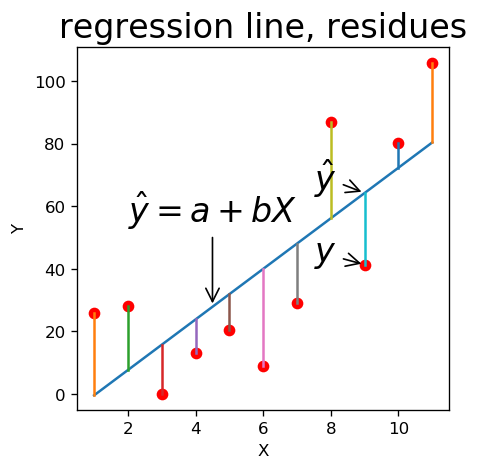

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plthttp://localhost:8889/notebooks/python/fhnw_lecture/notebooks/Regression%20Techniques.ipynb#Analytical-vs.-numerical-approach
%matplotlib inline
#length = 11
#X = np.arange(1, 12).reshape((11,1))
#y = X + 10 * np.random.rand(11).reshape((11, 1))
#y = y + 0.3 * y**2
#y = y - np.min(y)
#y = np.array([6, 12, 7, 12, 11, 10, 16, 22, 19, 27, 23]).reshape(11, 1)

#np.save('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle', y,\
#        allow_pickle=True)
#np.save('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle', X,\
#        allow_pickle=True)
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
model = LinearRegression()
model.fit(X, y)
y_hat = model.coef_ * X + model.intercept_
# plt.plot(X, y, 'ro')
# plt.show()
f = plt.figure(figsize=(4, 4), dpi=120)
plt.title(label='regression line, residues', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X, y, 'ro', X, y_hat)
#axes = plt.gca()
axes.set_ylim([np.min(y)-5, np.max(y) +5])
for i in range(len(y)):
    plt.plot((X[i, 0], X[i, 0]), (y[i], y_hat[i]))

axes.set_xlabel('X') 
axes.set_ylabel('Y')

axes.annotate('$y$', xy=(X[-3, 0], y[-3, 0]), xycoords='data',
            xytext=(X[-3, 0] - 1.5, y[-3, 0] + 1), textcoords='data',
            size = 20, arrowprops=dict(arrowstyle="->"))

axes.annotate('$\hat{y}$', xy=(X[-3, 0], y_hat[-3, 0]), xycoords='data',
            xytext=(X[-3, 0] - 1.5, y_hat[-3, 0] + 1), textcoords='data',
            size = 20, arrowprops=dict(arrowstyle="->"))

axes.annotate('$\hat{y} = a + bX$', xy=(X[3, 0] + 0.5, model.coef_ * (X[3, 0] + 0.5) + model.intercept_),
              xycoords='data', xytext=(X[3, 0] + 0.5, 55), textcoords='data',
              horizontalalignment = 'center',
              size = 20, arrowprops=dict(arrowstyle="->"))
plt.show()

#plt.close('all')


## Derivation of parameters analytically

We need the first derivative of the error-term with respect to the parameters. By setting the resulting equation equal to zero we assure that we get the parameter estimate at the minimum.

here is a example for the formula $f(x) = (x-1)^2$:
<img alt="taken from homepage of 20 newsgroups" caption="The different categories of the newsgroup posts" id="20_newsgroups" src="../images/first_derivative.png" width="320" height="320">

## derivative of the error term $(y - \hat{y})^2$:
* we expand $\hat{y} = a + b\cdot x$:
$$\sum_i^{n}(y_i - \hat{y_i})^2 = \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}$$
* we derive the equation with respect to $a$ and set the result equal to zero:
$$\frac{\delta \sum_i^{n}(y_i - \hat{y_i})^2}{\delta a} = -2\sum_i^{n}y_i + 2b\sum_i^{n}x_i + 2na = 0$$
* we solve for $a$ and get:
$$a = \bar{y} - b\bar{x}$$
* for $b$ we get in the same way and by substituting $a$ with the above result:
$$ b = \frac{\frac{1}{n}\sum_i^n(x_i - \bar{x})(y_i - \bar{y})}{\frac{1}{n}\sum_i^n (x_i - \bar{x})^2} = \frac{\text{cov}_{xy}}{\text{var}_x}$$

In [ ]:
# we can easily verify these results
print(f'the parameter b is the coefficient of the linear model {model.coef_}')
print(f'the parameter a is called the intercept of the model because it indicates\n where the regression line intercepts the y-axis at x=0 {model.intercept_}')

cov_xy =(1/X.shape[0]) * np.dot((X - np.mean(X)).T,y - np.mean(y))[0][0]
var_x = (1/X.shape[0]) * np.dot((X - np.mean(X)).T,X - np.mean(X))[0][0]
b = cov_xy/var_x
a = np.mean(y)-b*np.mean(X)
print(f'\nour empirical b parameter is: {b}')
print(f'our empircial a parameter is: {a}')

the parameter b is the coefficient of the linear model [[8.07912445]]
the parameter a is called the intercept of the model because it indicates
 where the regression line intercepts the y-axis at x=0 [-8.49032154]

our empirical b parameter is: 8.079124453577007
our empircial a parameter is: -8.490321540681805


## multivariate case: more than one x variable
\begin{align*}
    y_1&=a+b_1\cdot x_{11}+b_2\cdot x_{21}+\cdots + b_p\cdot x_{p1}\\
    y_2&=a+b_1\cdot x_{12}+b_2\cdot x_{22}+\cdots + b_p\cdot x_{p2}\\
    \ldots& \ldots\\
    y_i&=a+b_1\cdot x_{1i}+b_2\cdot x_{2i}+\cdots + b_p\cdot x_{pi}\\
  \end{align*}

\begin{equation*}
    \begin{bmatrix}
      y_1\\
      y_2\\
      .  \\
      .  \\
      .  \\
      y_i
    \end{bmatrix}
    = a+
    \begin{bmatrix}
      x_{11} & x_{21} & x_{31} & \ldots & x_{p1}\\
      x_{12} & x_{22} & x_{32} & \ldots & x_{p2}\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      x_{1i} & x_{2i} & x_{3i} & \ldots & x_{pi}\\
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
 b_1\\
      b_2\\
      .\\
      .\\
      .\\
      b_p
    \end{bmatrix}
\end{equation*}

Next, we can include the constant term $a$ into the vector $b$. This is done by adding an all-ones column to $\mathbf{X}$: 
    
\begin{equation*}
     \begin{bmatrix}
      y_1\\
      y_2\\
      .  \\
      .  \\
      .  \\
      y_i
    \end{bmatrix}
    =
    \begin{bmatrix}
      1& x_{11} & x_{21} & x_{31} & \ldots & x_{p1}\\
      1 &  x_{12} & x_{22} & x_{32} & \ldots & x_{p2}\\
      &\ldots&\ldots&\ldots&\ldots&\ldots\\
      &\ldots&\ldots&\ldots&\ldots&\ldots\\
      1& x_{1i} & x_{2i} & x_{3i} & \ldots & x_{pi}
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
      a\\
      b_1\\
      b_2\\
      .\\
      .\\
      b_p
    \end{bmatrix}
  \end{equation*}
  
In matrix notation this is written:
$$\mathbf{y} = \mathbf{X}\mathbf{b}$$


## derivation of $\mathbf{b}$ for the matrix notation
We apply the same steps as for the derivation above:
* we expand the error term:

  \begin{align*}
    \text{min}=&(\mathbf{y}-\hat{\mathbf{y}})^2=(\mathbf{y}-\mathbf{X}\mathbf{b})'(\mathbf{y}-\mathbf{X}\mathbf{b})=\\
    &(\mathbf{y}'-\mathbf{b}'\mathbf{X}')(\mathbf{y}-\mathbf{X}\mathbf{b})=\\
    &\mathbf{y}'\mathbf{y}-\mathbf{b}'\mathbf{X}'\mathbf{y}-\mathbf{y}'
    \mathbf{X}\mathbf{b}+\mathbf{b}'\mathbf{X}'\mathbf{X}\mathbf{b}=\\
    &\mathbf{y}'\mathbf{y}-2\mathbf{b}'\mathbf{X}'\mathbf{y}+\mathbf{b}'\mathbf{X}'
    \mathbf{X}\mathbf{b}\\
  \end{align*}
 
* derivative of the error term with respect to $\mathbf{b}$
* we set the result equal to zero and solve for $\mathbf{b}$

  \begin{align*}
    \frac{\delta}{\delta
      \mathbf{b}}=&-2\mathbf{X}'\mathbf{y}+2\mathbf{X}'\mathbf{X}\mathbf{b}=0\\
    2\mathbf{X}'\mathbf{X}\mathbf{b}=&2\mathbf{X}'\mathbf{y}\\
    \mathbf{b}=&(\mathbf{X}'\mathbf{X})^{-1}\mathbf{X}'\mathbf{y}\quad
    \text{(Here, we need the inverse of a matrix!)}
  \end{align*}


## Polynomial regression as an example for more than one variable
In order to easily demonstrate multiple linear regression, we can derive a new variable out of the variable x. For example we could take log(x) or -- as done here -- take the square of it $x^2$ (the quadratic term):<br> $y = a + b_1 x + b_2 x^2$

Some important points are:
* we now have two variables, i.e. we can apply our formula for matrix notation
* more variables will probably lead to a better fit
* the resulting regression line is not a straight line. __The term "linear" in linear regression signifies that the equation is linear in its parameters a, $\textbf{b}_\textbf{1}$, $\textbf{b}_\textbf{2}$. It does not mean that the regression line has to be a straight linear line!!__


/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(-5.0, 110.77315979942053)

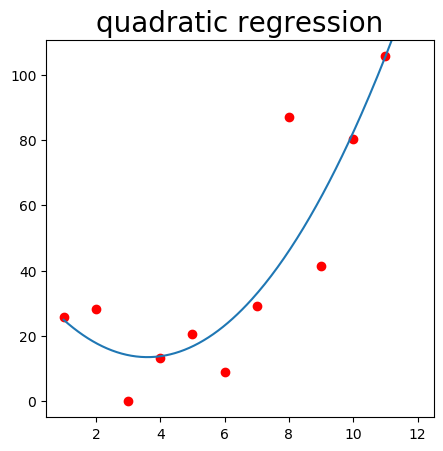

In [ ]:
from numpy.linalg import inv
# polynomial
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2]

# the x (small x) is just for plotting purpose
x = np.arange(1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2]

model.fit(X, y)
y_hat = np.dot(x , model.coef_.T)  + model.intercept_

f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='quadratic regression', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-5, np.max(y) +5])


In [ ]:
# again we can compare the parameters of the model with those resulting from 
# our derived equation:
# b=(X'X)^{-1} X'y
from numpy.linalg import inv

# first we have to add the intercept into our X-Variable; we rename it X_intercept
X_intercept = np.c_[np.ones(X.shape[0]), X]
coefs = np.dot(np.dot(inv(np.dot(X_intercept.T,X_intercept)),X_intercept.T),y)
print(f'the parameter b is the coefficient of the linear model {model.coef_}')
print(f'the parameter a is called the intercept of the model because it indicates\n where the regression line intercepts the y-axis at x=0 {model.intercept_}')

print(f'our coefs already include the intercept: {coefs}')

the parameter b is the coefficient of the linear model [[-12.14930516   1.68570247]]
the parameter a is called the intercept of the model because it indicates
 where the regression line intercepts the y-axis at x=0 [35.33794262]
our coefs already include the intercept: [[ 35.33794262]
 [-12.14930516]
 [  1.68570247]]


### Overfitting
We continue with adding variables and exagerate a little bit

The important points to note here:
* the fit to our empirical y-values gets better
* at the same time, the regression line starts behaving strangly
* the predictions made by the regression line in beneath the empirical y-values are likely to be grossly wrong: this is an example of __overfitting__

/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


(-10.0, 115.77315979942053)

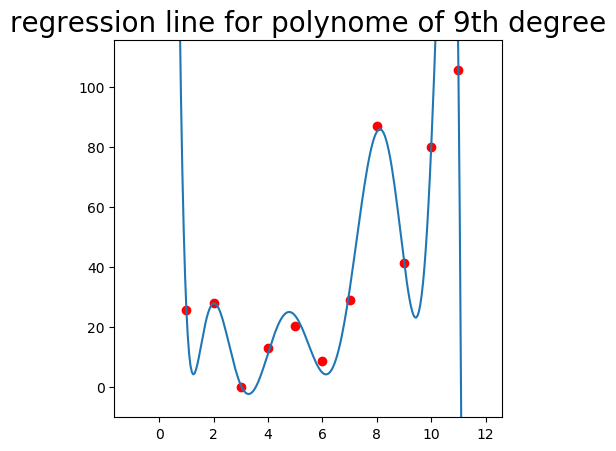

In [ ]:
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9]
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]
model.fit(X, y)
y_hat = np.dot(x , model.coef_.T)  + model.intercept_

f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression line for polynome of 9th degree', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +10])


### perfect fit: as many variables as data samples
A perfect fit is possible as is demonstrated next. We have as many variables (terms derived from x) as observations (data points). So for each data point we have a variable to accommodate it.<br>
__Note__ that a perfect fit is achieved with 10 variables + intercept. The intercept is also a parameter and in this case the number of observations $n$ equals the number of variables $p$, i.e. $p=n$.

the intercept and the coefficients are: [-3441.68656412], [[ 9.78924105e+03 -1.13036234e+04  7.22311928e+03 -2.87540354e+03
   7.50881771e+02 -1.30676904e+02  1.49833402e+01 -1.08407634e+00
   4.47383723e-02 -8.00850565e-04]]


/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


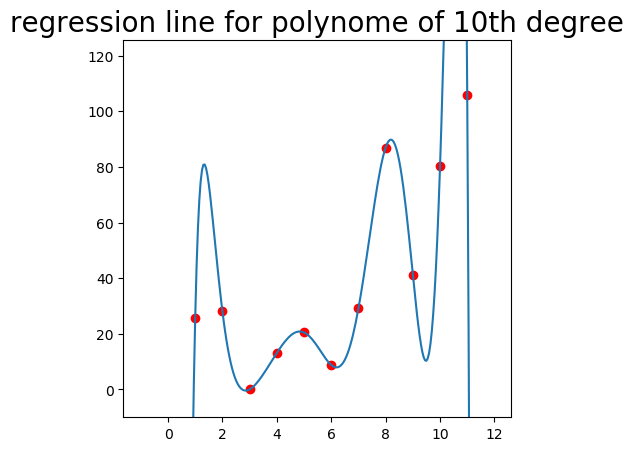

In [ ]:
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10]
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10]
model.fit(X, y)
y_hat = np.dot(x , model.coef_.T)  + model.intercept_

f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression line for polynome of 10th degree', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

print(f'the intercept and the coefficients are: {model.intercept_}, {model.coef_}')

## What happens if we have more variables than data points?
The short answer: a unique solution is not possible because there are infinitifely many possible ways to adjust $p$ parameters to accommodate $n$ observations when $p > n$.

The long answer: inversion of the matrix $\mathbf{X}'\mathbf{X}$ is not possible.

However, there are decompositions for matrix inversions that allow to invert singular matrices. Numpy is using such a decomposition, called LU-decomposition.

One way to see in python that the solution is erroneous is to use the scipy.linalg.solve package and solve for the matix S that solves $(\mathbf{X}'\mathbf{X})^{-1} \mathbf{S} = \mathbf{I}$.<br> $\mathbf{I}$ is called the eye-matrix with 1s in the diagonale and zeros otherwise:
$$
\mathbf{I}=\left[
\begin{array}{ccc}
   1 & \cdots & 0 \\
   \vdots & \ddots & \vdots \\
   0 & \cdots & 1
\end{array}
\right]
$$


In [ ]:
from numpy.linalg import inv
from scipy.linalg import solve
model = LinearRegression()
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10, X**11, X**12, X**13]

# this should give at least a warning, because matrix inversion as done above is not possible
# any more, due to singular covariance matrix [X'X]
model.fit(X, y)
#y_hat = np.dot(x , model.coef_.T)  + model.intercept_
XX = solve(inv(np.dot(X.T, X)), np.eye(13))

/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: LinAlgWarning: Ill-conditioned matrix (rcond=3.85425e-21): result may not be accurate.
  # Remove the CWD from sys.path while we load stuff.


# statistical package R
The R statistical package is behaving still in another way. No warning is issued but coefficients are only computed for 11 variables (intercept included).
<img alt="taken from homepage of 20 newsgroups" caption="The different categories of the newsgroup posts" id="20_newsgroups" src="../images/R_inverse_example.png" width="640" height="640">